In [193]:
import pandas as pd 

In [183]:
NBA_player_data=pd.read_excel("/Users/daphne/Documents/ NBA Data Sets/modelling_player_copy.xlsx")

In [197]:
NBA_player_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0.3', 'GAME_ID', 'TEAM_ID_x',
       'TEAM_ABBREVIATION', 'PLAYER_ID', 'PLAYER_NAME', 'PTS', 'SEASON_x',
       'IS_HOME', 'TEAM_WINS', 'TEAM_CITY', 'GAME_DATE_EST_x', 'eFG%',
       'avg_min', 'avg_pts_x', 'avg_reb_x', 'avg_ast_x', 'avg_stl_x',
       'avg_blk', 'avg_to_x', 'avg_pf_x', 'avg_fg_pct_x', 'avg_fg3_pct_x',
       'avg_ft_pct_x', 'avg_plus_minus', 'avg_ts_pct', 'avg_efg_pct_x',
       'Unnamed: 0', 'avg_stl_y', 'avg_to_y'],
      dtype='object')

In [203]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor



# Define features (X) and target (y)
X = NBA_player_data[['avg_min', 'avg_pts_x','avg_fg_pct_x', 'avg_fg3_pct_x',
                     'avg_ft_pct_x','avg_ts_pct', 'avg_efg_pct_x',
                     'avg_stl_y', 'avg_to_y']]
y = NBA_player_data['PTS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

# Initialize the XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Extract the best model
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model's performance
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Best Mean Absolute Error: {mae_best:.2f}")
print(f"Best Mean Squared Error: {mse_best:.2f}")
print(f"Best R^2 Score: {r2_best:.2f}")

# Print the best hyperparameters
print("Best Hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

# Feature Importance
importance = best_model.feature_importances_
features = X.columns

# Create a DataFrame to hold feature names and their importance scores
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)




Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Mean Absolute Error: 4.34
Best Mean Squared Error: 31.51
Best R^2 Score: 0.54
Best Hyperparameters found by GridSearchCV:
{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}


In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns



# Define features (X) and target (y)
X = NBA_player_data[['avg_min', 'avg_pts_x', 'avg_reb_x', 'avg_ast_x', 'avg_stl_x',
                     'avg_blk', 'avg_to_x', 'avg_pf_x', 'avg_fg_pct_x', 'avg_fg3_pct_x',
                     'avg_ft_pct_x', 'avg_plus_minus', 'avg_ts_pct', 'avg_efg_pct_x',
                     'avg_stl_y', 'avg_to_y']]
y = NBA_player_data['PTS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100],
    'max_depth': [5],
    'min_samples_split': [2,5],
    'min_samples_leaf': [1, 2],
    #'bootstrap': [True]
}

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with 3-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Extract the best model
best_rf_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

# Make predictions using the best model
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the best model's performance
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Best Mean Absolute Error: {mae_best_rf:.2f}")
print(f"Best Mean Squared Error: {mse_best_rf:.2f}")
print(f"Best R^2 Score: {r2_best_rf:.2f}")



Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Hyperparameters found by GridSearchCV:
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Mean Absolute Error: 4.53
Best Mean Squared Error: 34.47
Best R^2 Score: 0.49


In [175]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

# Define features (X) and target (y)
features = ['avg_min', 'avg_pts_x', 'avg_reb_x', 'avg_ast_x', 'avg_stl_x',
            'avg_blk', 'avg_to_x', 'avg_pf_x', 'avg_fg_pct_x', 'avg_fg3_pct_x',
            'avg_ft_pct_x', 'avg_plus_minus', 'avg_ts_pct', 'avg_efg_pct_x',
            'avg_stl_y', 'avg_to_y']
target = 'PTS'

X = NBA_player_data[features]
y = NBA_player_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the LightGBM model for regression
lgb_model = lgb.LGBMRegressor(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100,200],
    'learning_rate': [0.01, 0.1, ],
    'num_leaves': [31, 50],
    'max_depth': [5,7],
 
}

# Initialize GridSearchCV with 3-fold cross-validation
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, 
                           cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Extract the best model
best_lgb_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

# Make predictions using the best model
y_pred_best_lgb = best_lgb_model.predict(X_test)

# Evaluate the best model's performance
mae_best_lgb = mean_absolute_error(y_test, y_pred_best_lgb)
mse_best_lgb = mean_squared_error(y_test, y_pred_best_lgb)
r2_best_lgb = r2_score(y_test, y_pred_best_lgb)

print(f"Best Mean Absolute Error: {mae_best_lgb:.2f}")
print(f"Best Mean Squared Error: {mse_best_lgb:.2f}")
print(f"Best R^2 Score: {r2_best_lgb:.2f}")




Fitting 3 folds for each of 24 candidates, totalling 72 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3294
[LightGBM] [Info] Number of data points in the train set: 342812, number of used features: 16
[LightGBM] [Info] Start training from score 10.099731
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

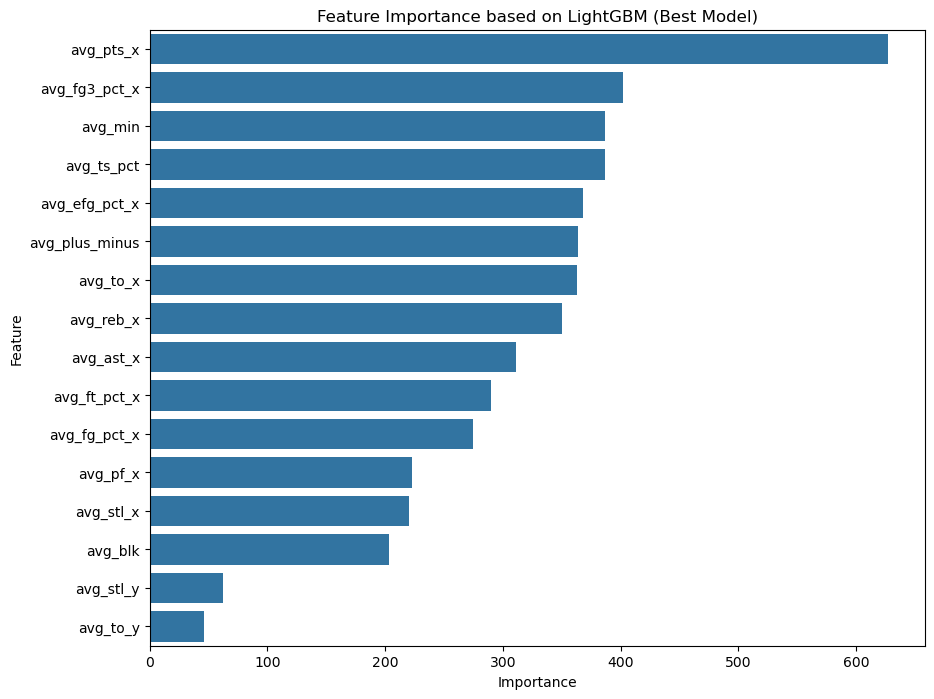

In [71]:
# Plot feature importance of the best model
importance = best_lgb_model.feature_importances_
features = X.columns

# Create a DataFrame to hold feature names and their importance scores
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance based on LightGBM (Best Model)')
plt.show()

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
import seaborn as sns


# Define features (X) and target (y)
features = ['avg_min', 'avg_pts_x', 'avg_reb_x', 'avg_ast_x', 'avg_stl_x',
            'avg_blk', 'avg_to_x', 'avg_pf_x', 'avg_fg_pct_x', 'avg_fg3_pct_x',
            'avg_ft_pct_x', 'avg_plus_minus', 'avg_ts_pct', 'avg_efg_pct_x',
            'avg_stl_y', 'avg_to_y']
target = 'PTS'

X = NBA_player_data[features]
y = NBA_player_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the CatBoost model for regression
catboost_model = CatBoostRegressor(random_state=42, verbose=0)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'iterations': [100, 200,300],
    'learning_rate': [0.01, 0.1],
    'depth': [4, 6, 8,],
    
}

# Initialize GridSearchCV with 3-fold cross-validation
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, 
                           cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Extract the best model
best_catboost_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

# Make predictions using the best model
y_pred_best_catboost = best_catboost_model.predict(X_test)

# Evaluate the best model's performance
mae_best_catboost = mean_absolute_error(y_test, y_pred_best_catboost)
mse_best_catboost = mean_squared_error(y_test, y_pred_best_catboost)
r2_best_catboost = r2_score(y_test, y_pred_best_catboost)

print(f"Best Mean Absolute Error: {mae_best_catboost:.2f}")
print(f"Best Mean Squared Error: {mse_best_catboost:.2f}")
print(f"Best R^2 Score: {r2_best_catboost:.2f}")

# Plot feature importance of the best model
importance = best_catboost_model.get_feature_importance()
features = X.columns

# Create a DataFrame to hold feature names and their importance scores
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})



Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Hyperparameters found by GridSearchCV:
{'depth': 8, 'iterations': 300, 'learning_rate': 0.1}
Best Mean Absolute Error: 4.46
Best Mean Squared Error: 33.26
Best R^2 Score: 0.51


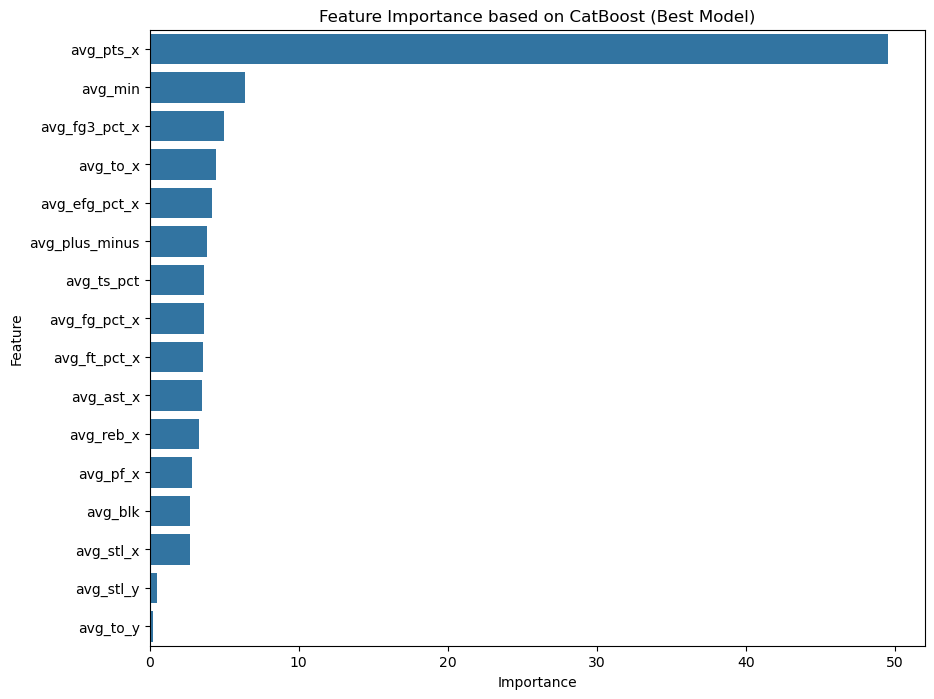

In [85]:
# Plot feature importance of the best model
importance = best_catboost_model.get_feature_importance()
features = X.columns

# Create a DataFrame to hold feature names and their importance scores
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance based on CatBoost (Best Model)')
plt.show()

In [201]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

# Define features (X) and target (y)
X = NBA_player_data[['avg_min', 'avg_pts_x', 'avg_reb_x', 'avg_ast_x', 'avg_stl_x',
                     'avg_blk', 'avg_to_x', 'avg_pf_x', 'avg_fg_pct_x', 'avg_fg3_pct_x',
                     'avg_ft_pct_x', 'avg_plus_minus', 'avg_ts_pct', 'avg_efg_pct_x',
                     'avg_stl_y', 'avg_to_y']]
y = NBA_player_data['PTS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': (100, 50),
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01],  # Regularization term
    'max_iter': [200, 300]
}

# Initialize the MLPRegressor
mlp_model = MLPRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=mlp_model, param_grid=param_grid, 
                           scoring='r2', cv=5, verbose=1, n_jobs=-1)

# Train the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model after GridSearchCV
best_mlp_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_mlp_best = best_mlp_model.predict(X_test)

# Evaluate the model's performance
mae_mlp = mean_absolute_error(y_test, y_pred_mlp_best)
mse_mlp = mean_squared_error(y_test, y_pred_mlp_best)
r2_mlp = r2_score(y_test, y_pred_mlp_best)

print(f"Best Parameters found by GridSearchCV: {grid_search.best_params_}")
print(f"Mean Absolute Error: {mae_mlp:.2f}")
print(f"Mean Squared Error: {mse_mlp:.2f}")
print(f"R^2 Score: {r2_mlp:.2f}")

# Permutation Feature Importance
perm_importance = permutation_importance(best_mlp_model, X_test, y_test, n_repeats=10, random_state=42)

# Get importance scores and feature names
feature_importance = perm_importance.importances_mean
features = X.columns

# Create a DataFrame to hold feature names and their importance scores
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)



Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_

Best Parameters found by GridSearchCV: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': 50, 'max_iter': 300, 'solver': 'adam'}
Mean Absolute Error: 4.52
Mean Squared Error: 34.10
R^2 Score: 0.50
